<a href="https://colab.research.google.com/github/oswaldtrashsk/paris24-bousselmi-hericotte-g2/blob/main/GoldAnalysiscolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1 : Installing necessary libraries
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!pip install yfinance matplotlib pandas seaborn


In [2]:
# 2 : Importing necessary modules
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import yfinance as yf
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [3]:
# 3 : Data getting
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# we will take the values of Gold, Silver, the US dollar index, and the S&P 500 as tickers.
tickers = ['GC=F', 'SI=F','DX-Y.NYB','^GSPC']

# and we can then  find the closing prices of the four indexes every week for a range of time, here i used period_ so i can change if needed
period_ = ('5y')

#then we can find the daily values of each over the period 'period_'
gold = yf.Ticker(tickers[0]).history(period = period_, interval = '1d')['Close']
silver = yf.Ticker(tickers[1]).history(period = period_, interval = '1d')['Close']
dollar = yf.Ticker(tickers[2]).history(period =period_, interval = '1d')['Close']
sp = yf.Ticker(tickers[3]).history(period = period_, interval = '1d')['Close']

# now,  we need a way to group all data in one table and rename the columns:
data_raw = pd.concat([gold, silver, dollar, sp], axis=1)
data_raw.columns = ['Gold', 'Silver', 'US Dollar', 'S&P 500']

# then i found one problem being that many data were missing so i used the .dropna function to erase those missing data
clean_data = data_raw.dropna()

#and we can check to see if any data is missing a second time using :
print(clean_data.isnull().isnull().sum())

Gold         0
Silver       0
US Dollar    0
S&P 500      0
dtype: int64


In [4]:
# 4 now to see if the dataframe is updated correctly :
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

clean_data.head()

,Gold,Silver,US Dollar,S&P 500
Date,,,,
2019-04-15 00:00:00-04:00,1286.800049,14.948,96.940002,2905.580078
2019-04-16 00:00:00-04:00,1272.599976,14.891,97.040001,2907.060059
2019-04-17 00:00:00-04:00,1272.199951,14.921,97.010002,2900.449951
2019-04-18 00:00:00-04:00,1271.900024,14.937,97.470001,2905.030029
2019-04-22 00:00:00-04:00,1273.500000,14.957,97.279999,2907.969971


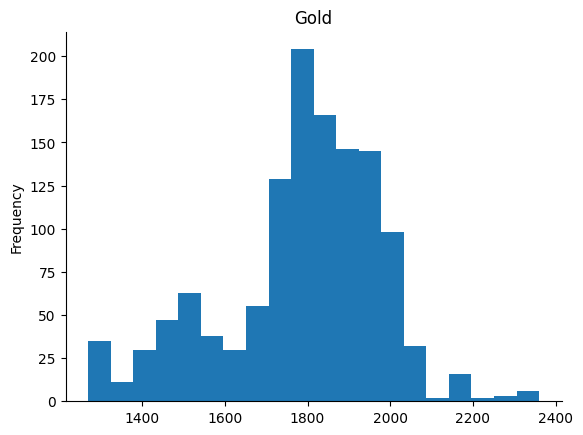

In [6]:
from matplotlib import pyplot as plt
clean_data['Gold'].plot(kind='hist', bins=20, title='Gold')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# and we can get a lot of information using describe :
clean_data.describe()

,Gold,Silver,US Dollar,S&P 500
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,1786.320347,21.892104,99.037037,3884.316352
std,193.937156,3.696585,5.459929,647.250143
min,1269.300049,11.735000,89.440002,2237.399902
25%,1710.024994,18.518000,94.145002,3294.825073
50%,1811.299988,22.873000,98.305000,3980.610107
75%,1921.099976,24.581750,103.430000,4390.682373
max,2360.199951,29.398001,114.110001,5254.350098


,Gold,Silver,US Dollar,S&P 500
Gold,1.000000,0.786005,0.130391,0.746804
Silver,0.786005,1.000000,-0.296257,0.692386
US Dollar,0.130391,-0.296257,1.000000,0.172498
S&P 500,0.746804,0.692386,0.172498,1.000000


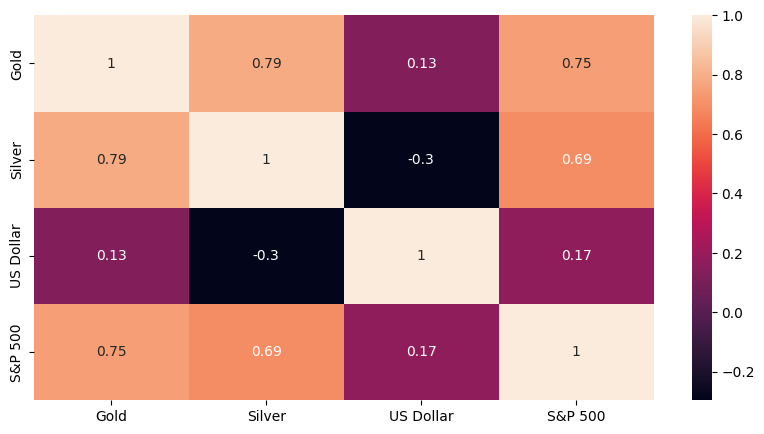

In [7]:
# 5 : we now want to create a correlation heatmap, in order to know how relevant other assets are to the main investing asset (Gold)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


corr = clean_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)
corr.style.background_gradient(cmap = "bwr")

**as we can see gold is very correlated to silver and the sp 500. on the other hand, the dollar and gold are rarely moving in relationship.**

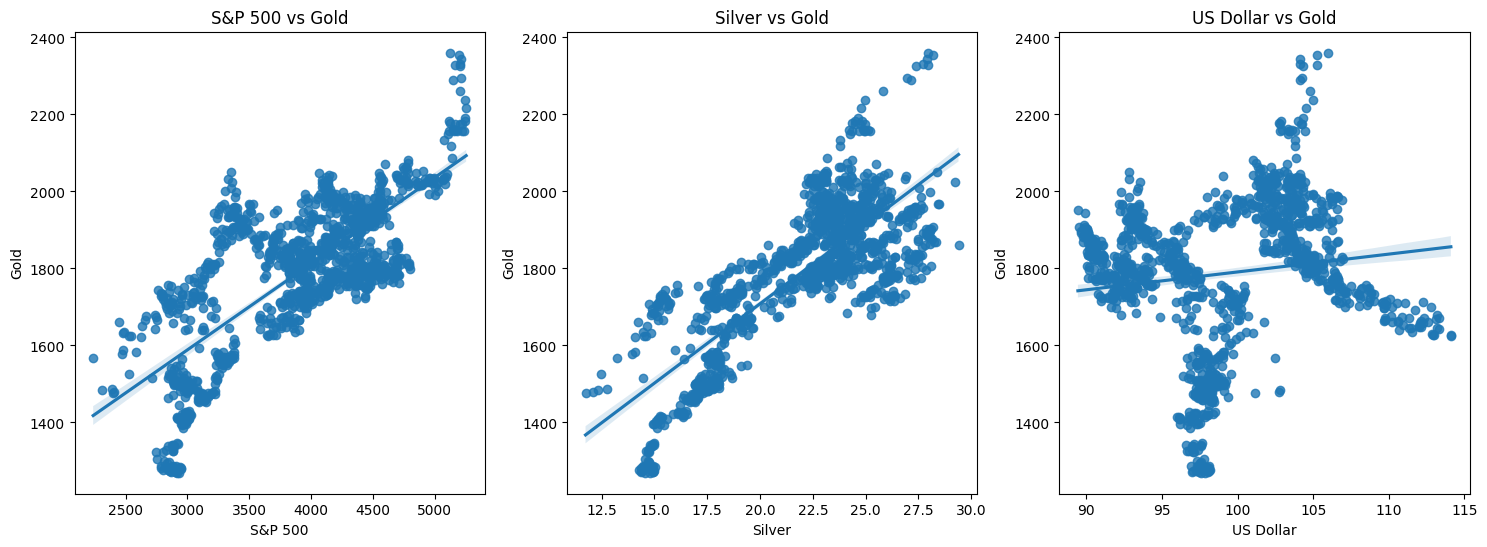

In [8]:
# 6 : Another good measure of the link between gold prices, silver prices, the US dollar index and the S&P 500 is the regression analysis.
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


sns.regplot(x="S&P 500", y="Gold", data=clean_data, ax=axes[0])
axes[0].set_title('S&P 500 vs Gold')

sns.regplot(x="Silver", y="Gold", data=clean_data, ax=axes[1])
axes[1].set_title('Silver vs Gold')

sns.regplot(x="US Dollar", y="Gold", data=clean_data, ax=axes[2])
axes[2].set_title('US Dollar vs Gold')

plt.show()

**Once again, it is clear that gold and S&P are most related when the dollar depends on many other elements. we can't upload the project and ask you to install a webdriver, but when i did i could connect to tradingviews and obtain the gold prices every five seconds. using the regression coefficients above could have allowed us to create accurate ratios**

<ipython-input-11-723d9fb9c8ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Gold_MA_3'] = clean_data['Gold'].rolling(window=3).mean()
<ipython-input-11-723d9fb9c8ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Gold_MA_6'] = clean_data['Gold'].rolling(window=6).mean()


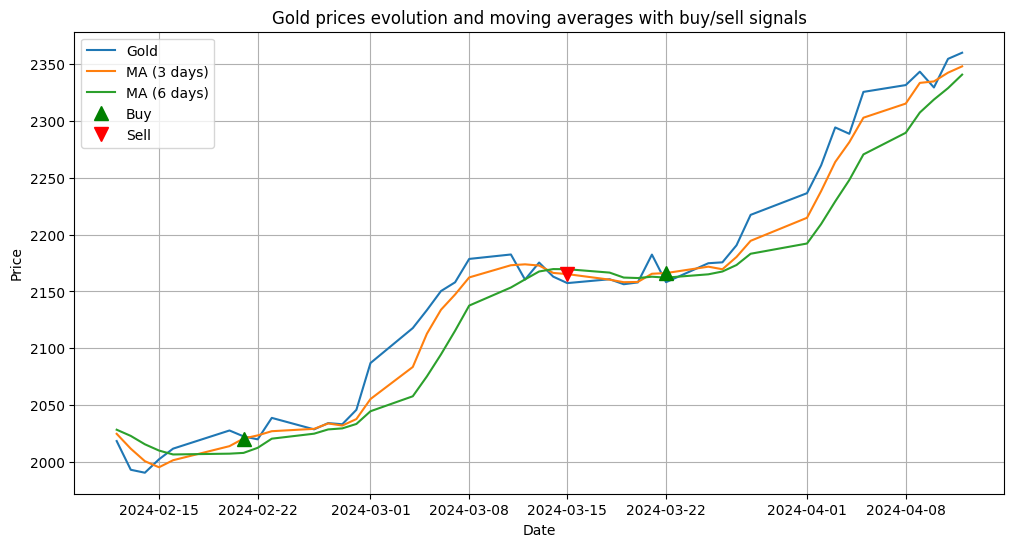

In [11]:


clean_data['Gold_MA_3'] = clean_data['Gold'].rolling(window=3).mean()
clean_data['Gold_MA_6'] = clean_data['Gold'].rolling(window=6).mean()

#using the entire data, the moving average was useless. we therefore tried to isolate a part of the data, 60 days to be precise.

last_2M_data = clean_data.loc[clean_data.index >= clean_data.index[-1] - timedelta(days=60)]
last_2M_data = last_2M_data.copy()

# to highlight the most obvious support lines using the moving averages, we need to create the signals used in the graph (we used those in class)

last_2M_data['signal'] = np.where(last_2M_data['Gold_MA_3'] > last_2M_data['Gold_MA_6'], 1.0, 0.0)
last_2M_data['signal'] = last_2M_data['signal'].shift()
last_2M_data['positions'] = last_2M_data['signal'].diff()

plt.figure(figsize=(12, 6))
plt.plot(last_2M_data.index, last_2M_data['Gold'], label='Gold Price')
plt.plot(last_2M_data.index, last_2M_data['Gold_MA_3'], label='Short MA (3 days)')
plt.plot(last_2M_data.index, last_2M_data['Gold_MA_6'], label='Long MA (6 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.plot(last_2M_data.loc[last_2M_data.positions == 1.0].index, last_2M_data.Gold_MA_3[last_2M_data.positions == 1.0],
         '^', markersize=10, color='g', label='Buy')
plt.plot(last_2M_data.loc[last_2M_data.positions == -1.0].index, last_2M_data.Gold_MA_3[last_2M_data.positions == -1.0],
         'v', markersize=10, color='r', label='Sell')

plt.legend(['Gold', 'MA (3 days)', 'MA (6 days)', 'Buy', 'Sell'])
plt.title('Gold prices evolution and moving averages with buy/sell signals')
plt.show()

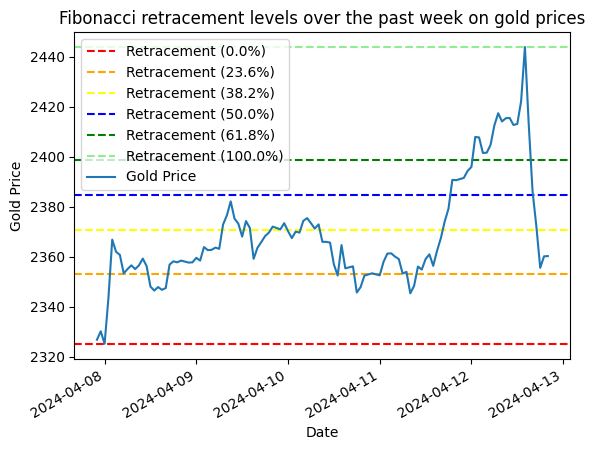

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
last_week_data = yf.Ticker("GC=F").history(period = "1wk", interval = "1h")['Close']

high = last_week_data.max()
low = last_week_data.min()


retracements = [0, 23.6, 38.2, 50, 61.8, 100]
fib_levels = [(high - low) * level / 100 + low for level in retracements]

colors = ['red', 'orange', 'yellow', 'blue', 'green', 'lightgreen']

for level, color in zip(fib_levels, colors):
    plt.axhline(y=level, color=color, linestyle='--', label=f'Retracement ({retracements[fib_levels.index(level)]:.1f}%)')


plt.plot(last_week_data.index, last_week_data, label='Gold Price')
plt.gcf().autofmt_xdate()
plt.gca().xaxis_date()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.legend()
plt.title('Fibonacci retracement levels over the past week on gold prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

**this graph is used by traders to assess the level of risk on investments of shorter term. the numbers are derived from fibonnaci sequence, when dividing n by n+1, or n by n+2. combined with the moving average, the data gives a relevant insight on the future price direction. they are reference support lines : when the price hits a low, it is interesting to put a stop-loss at one of the percentages in the legend. the golden ratios are generally considered to be 23.6 and 38.2 % of retracement to reenter the market.**